# Baixando dados do 1° periodo e 2° periodo

In [1]:
# 1° periodo
!wget -nc https://www.dropbox.com/s/8306rx0f4ojj32g/S120200528.csv
!wget -nc https://www.dropbox.com/s/o73fy7fxb9fvdv6/S220200531.csv

# 2° periodo
!wget -nc https://www.dropbox.com/s/3jsqmvh4doz2pnl/S120201007.csv
!wget -nc https://www.dropbox.com/s/0nrz0emgevid5mu/S220201008.csv

--2022-04-22 23:51:30--  https://www.dropbox.com/s/8306rx0f4ojj32g/S120200528.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8306rx0f4ojj32g/S120200528.csv [following]
--2022-04-22 23:51:31--  https://www.dropbox.com/s/raw/8306rx0f4ojj32g/S120200528.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca8c5768262ad1697db5571550b.dl.dropboxusercontent.com/cd/0/inline/Bj6vOK0PH4f8ucORDXYFInW38qlDqwi1YNYWkzVU2sgzNjpnQe15QpdSPZbDTCHzDCunSROxPCq-g46qpuBZ0uGtYnM906eFhG2yK0dtZDzxUG-4roHYUgxs1hXKYMYMHp6iCnmSz062ZIn26IRsB23q5wIlXZdd38WTLTVMa8n1fQ/file# [following]
--2022-04-22 23:51:31--  https://uca8c5768262ad1697db5571550b.dl.dropboxusercontent.com/cd/0/inline/Bj6vOK0PH4f8ucORDXYFInW38qlDqwi1YNYWkzVU2sgzNjpnQe15QpdSPZbDTC

# ANALISE EXPLORATÓRIA

## Importa as bibliotecas utilizadas

In [2]:
import os                                                # PARA COMANDOS DO SISTEMA
import pandas as pd                                      # PARA MANIPUTACAO DE DADOS CSV
import numpy as np                                       # PARA OPERACOES MATEMATICAS (sqrt, abs,...)
import matplotlib.pyplot as plt                          # PARA PLOT DE GRAFICOS
import seaborn as sns                                    # PARA PLOT DE GRAFICOS
from pickle import dump                                  # Para salvar arquivos
import cv2                                               # Para trabalhar com imagens
from google.colab import files                           # Para baixar os arquivos
import zipfile                                           # Para zipar arquivos
import itertools
import random

from sklearn.utils import shuffle                        # PARA EMBARALHAR OS DADOS
from sklearn.model_selection import train_test_split     # PARA SEPARAR OS DADOS (TREINO,TESTE)
from sklearn import preprocessing                        # Para preprocessar os dados
from sklearn.decomposition import PCA                    # Para preprocessar os dados
from sklearn.metrics import multilabel_confusion_matrix  # Para plotar a matriz de confusão
from sklearn.metrics import confusion_matrix             # Para plotar a matriz de confusão
from sklearn.utils import class_weight                   # Para aplicar pesos a cada classe

import tensorflow as tf                                # PARA REDES NEURAIS
from tensorflow import keras                           # PARA REDES NEURAIS
from keras.utils.vis_utils import plot_model           # PARA REDES NEURAIS
from keras import layers                               # PARA REDES NEURAIS
from keras.callbacks import ModelCheckpoint            # PARA SALVAR OS PESOS DA REDE NEURAL
from google.colab import data_table                    # PARA FORMATAÇÃO DAS TABELAS DO COLAB


data_table.enable_dataframe_formatter()

## Lê os datasets

In [3]:
colnames_S1=['fid', 'DN_S1',
             'S1_VHcount', 'S1_VHsum', 'S1_VHmean', 'S1_VHmedian', 'S1_VHstdev', 'S1_VHmin', 'S1_VHmax', 'S1_VHrange', 'S1_VHminority', 'S1_VHmajority', 'S1_VHvariety', 'S1_VHvariance', 
             'S1_VVcount', 'S1_VVsum', 'S1_VVmean', 'S1_VVmedian', 'S1_VVstdev', 'S1_VVmin', 'S1_VVmax', 'S1_VVrange', 'S1_VVminority', 'S1_VVmajority', 'S1_VVvariety', 'S1_VVvariance', 
             ]

colnames_S2=['fid', 'DN_S2',
             'S2_B1_count',  'S2_B1_sum',  'S2_B1_mean',  'S2_B1_median',  'S2_B1_stdev',  'S2_B1_min',  'S2_B1_max',  'S2_B1_range',  'S2_B1_minority',  'S2_B1_majority',  'S2_B1_variety',  'S2_B1_variance',
             'S2_B2_count',  'S2_B2_sum',  'S2_B2_mean',  'S2_B2_median',  'S2_B2_stdev',  'S2_B2_min',  'S2_B2_max',  'S2_B2_range',  'S2_B2_minority',  'S2_B2_majority',  'S2_B2_variety',  'S2_B2_variance',
             'S2_B3_count',  'S2_B3_sum',  'S2_B3_mean',  'S2_B3_median',  'S2_B3_stdev',  'S2_B3_min',  'S2_B3_max',  'S2_B3_range',  'S2_B3_minority',  'S2_B3_majority',  'S2_B3_variety',  'S2_B3_variance',
             'S2_B4_count',  'S2_B4_sum',  'S2_B4_mean',  'S2_B4_median',  'S2_B4_stdev',  'S2_B4_min',  'S2_B4_max',  'S2_B4_range',  'S2_B4_minority',  'S2_B4_majority',  'S2_B4_variety',  'S2_B4_variance',
             'S2_B5_count',  'S2_B5_sum',  'S2_B5_mean',  'S2_B5_median',  'S2_B5_stdev',  'S2_B5_min',  'S2_B5_max',  'S2_B5_range',  'S2_B5_minority',  'S2_B5_majority',  'S2_B5_variety',  'S2_B5_variance',
             'S2_B6_count',  'S2_B6_sum',  'S2_B6_mean',  'S2_B6_median',  'S2_B6_stdev',  'S2_B6_min',  'S2_B6_max',  'S2_B6_range',  'S2_B6_minority',  'S2_B6_majority',  'S2_B6_variety',  'S2_B6_variance',
             'S2_B7_count',  'S2_B7_sum',  'S2_B7_mean',  'S2_B7_median',  'S2_B7_stdev',  'S2_B7_min',  'S2_B7_max',  'S2_B7_range',  'S2_B7_minority',  'S2_B7_majority',  'S2_B7_variety',  'S2_B7_variance',
             'S2_B8_count',  'S2_B8_sum',  'S2_B8_mean',  'S2_B8_median',  'S2_B8_stdev',  'S2_B8_min',  'S2_B8_max',  'S2_B8_range',  'S2_B8_minority',  'S2_B8_majority',  'S2_B8_variety',  'S2_B8_variance',
             'S2_B8A_count', 'S2_B8A_sum', 'S2_B8A_mean', 'S2_B8A_median', 'S2_B8A_stdev', 'S2_B8A_min', 'S2_B8A_max', 'S2_B8A_range', 'S2_B8A_minority', 'S2_B8A_majority', 'S2_B8A_variety', 'S2_B8A_variance',
             'S2_B9_count',  'S2_B9_sum',  'S2_B9_mean',  'S2_B9_median',  'S2_B9_stdev',  'S2_B9_min',  'S2_B9_max',  'S2_B9_range',  'S2_B9_minority',  'S2_B9_majority',  'S2_B9_variety',  'S2_B9_variance',
             'S2_B10_count', 'S2_B10_sum', 'S2_B10_mean', 'S2_B10_median', 'S2_B10_stdev', 'S2_B10_min', 'S2_B10_max', 'S2_B10_range', 'S2_B10_minority', 'S2_B10_majority', 'S2_B10_variety', 'S2_B10_variance',
             'S2_B11_count', 'S2_B11_sum', 'S2_B11_mean', 'S2_B11_median', 'S2_B11_stdev', 'S2_B11_min', 'S2_B11_max', 'S2_B11_range', 'S2_B11_minority', 'S2_B11_majority', 'S2_B11_variety', 'S2_B11_variance',
             'S2_B12_count', 'S2_B12_sum', 'S2_B12_mean', 'S2_B12_median', 'S2_B12_stdev', 'S2_B12_min', 'S2_B12_max', 'S2_B12_range', 'S2_B12_minority', 'S2_B12_majority', 'S2_B12_variety', 'S2_B12_variance',
             ]

dataset_p1_S1 = pd.read_csv("S120200528.csv", skiprows=1, names=colnames_S1, low_memory=False)
dataset_p1_S2 = pd.read_csv("S220200531.csv", skiprows=1, names=colnames_S2, low_memory=False)

dataset_p2_S1 = pd.read_csv("S120201007.csv", skiprows=1, names=colnames_S1, low_memory=False)
dataset_p2_S2 = pd.read_csv("S220201008.csv", skiprows=1, names=colnames_S2, low_memory=False)


## Combina os 2 datasets onde os ids são iguais (mesmo local)

In [4]:
dataset_P1 = pd.merge(dataset_p1_S1, dataset_p1_S2, on='fid')
dataset_P2 = pd.merge(dataset_p2_S1, dataset_p2_S2, on='fid')
dataset = pd.concat([dataset_P1, dataset_P2], ignore_index=True)
dataset.reset_index(inplace=True, drop=True)

## Existe uma diferença de ~3 dias entre as imagens, apesar de poucos dias a classe pode ter sido alterada ???? Ex.(agricultura --> pasto)y, neste caso considerar as áreas sem alteração de classe

In [5]:
dataset = dataset[dataset['DN_S1']==dataset['DN_S2']]
dataset.rename(columns={'DN_S1': 'DN'}, inplace = True)
dataset.drop(columns=['DN_S2'], inplace = True)
dataset.reset_index(inplace=True, drop=True)
dataset


,fid,DN,S1_VHcount,S1_VHsum,S1_VHmean,S1_VHmedian,S1_VHstdev,S1_VHmin,S1_VHmax,S1_VHrange,...,S2_B12_mean,S2_B12_median,S2_B12_stdev,S2_B12_min,S2_B12_max,S2_B12_range,S2_B12_minority,S2_B12_majority,S2_B12_variety,S2_B12_variance
0,1250,3,27.0,0.795952,0.029480,0.026813,0.012523,0.013947,0.067887,0.053940,...,592.000000,587.0,127.835180,419.0,821.0,402.0,419.0,419.0,12.0,16341.833333
1,1251,33,40.0,0.987869,0.024697,0.021505,0.014039,0.002930,0.079253,0.076323,...,340.055556,342.5,54.801128,266.0,453.0,187.0,266.0,266.0,18.0,3003.163580
2,1274,3,22.0,0.593056,0.026957,0.024638,0.009006,0.014618,0.044852,0.030234,...,654.375000,647.0,50.581463,586.0,776.0,190.0,586.0,586.0,16.0,2558.484375
3,1282,4,36.0,0.988538,0.027459,0.023446,0.014222,0.006988,0.069067,0.062079,...,782.400000,755.0,133.005037,610.0,1101.0,491.0,610.0,610.0,20.0,17690.340000
4,1283,33,2.0,0.058888,0.029444,0.029444,0.007081,0.022363,0.036525,0.014161,...,310.000000,310.0,35.000000,275.0,345.0,70.0,275.0,275.0,2.0,1225.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180123,98176,3,48522.0,1856.529188,0.038262,0.033966,0.020084,0.001464,0.249638,0.248173,...,626.942461,590.0,212.088514,402.0,2984.0,2582.0,402.0,588.0,1040.0,44981.537880
180124,98177,39,6482.0,47.904245,0.007390,0.006470,0.004631,0.000982,0.087139,0.086157,...,2663.963332,2689.0,183.785320,749.0,3055.0,2306.0,749.0,2667.0,507.0,33777.044008
180125,98196,39,6353.0,42.290508,0.006657,0.005685,0.004313,0.000198,0.091714,0.091516,...,2950.305799,2984.0,166.463218,1103.0,3419.0,2316.0,1103.0,3022.0,561.0,27710.003021
180126,98213,3,177312.0,6431.275320,0.036271,0.032136,0.019893,0.000929,0.370145,0.369216,...,645.617092,599.0,233.255853,105.0,3280.0,3175.0,105.0,567.0,2101.0,54408.293099


## Verifica as classes e o balanceamento dos dados

15    84940
41    50904
3     20054
12     9784
39     5676
4      4034
33     3362
11     1216
0       108
24       50
Name: DN, dtype: int64


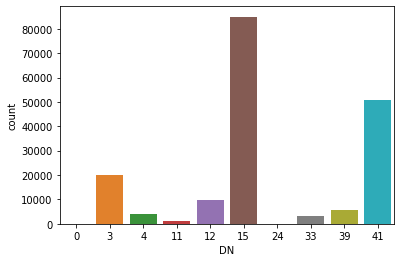

In [6]:
print(dataset.DN.value_counts())
sns.countplot(x='DN', data=dataset);

## A classe "0" não está representada na documentação em "https://mapbiomas.org/codigos-de-legenda", por isso serão removidas

In [7]:
dataset = dataset.loc[dataset['DN']!=0]

## Cacula os indices de vegetação do Sentinel-1
Fonte: https://www.mdpi.com/2072-4292/11/12/1441/pdf

### Cacula o NRPB - Normalized Ratio Procedure between Bands (VH-VV)/(VH+VV)

In [8]:
S1_NRPB = (dataset['S1_VHmean']-dataset['S1_VVmean'])/(dataset['S1_VHmean']+dataset['S1_VVmean'])
dataset.insert(1, 'S1_NRPB', S1_NRPB)

### Calcula o NDVI - Vegetation Index (2.572-0.05047\*VH+0.176\*VV+3.422\*S1_NRPB)

In [9]:
S1_NDVI = 2.572 - 0.05047 * dataset['S1_VHmean'] + 0.176* dataset['S1_VVmean'] + 3.422 * S1_NRPB
dataset.insert(1, 'S1_NDVI', S1_NDVI)

##Cacula os indices de vegetação do Sentinel-2
Fonte: https://www.mdpi.com/2072-4292/11/12/1441/pdf

Fonte: https://gisgeography.com/


### Calcula o NDVI - Vegetation Index (B8-B4)/(B8+B4)

In [10]:
S2_NDVI = (dataset['S2_B8_mean']-dataset['S2_B4_mean'])/(dataset['S2_B8_mean']+dataset['S2_B4_mean'])
dataset.insert(1, 'S2_NDVI', S2_NDVI)

### Calcula o NDMI - Moisture Index (B8A-B11)/(B8A+B11)

In [11]:
S2_NDMI = (dataset['S2_B8A_mean']-dataset['S2_B11_mean'])/(dataset['S2_B8A_mean']+dataset['S2_B11_mean'])
dataset.insert(1, 'S2_NDMI', S2_NDMI)

## Verifica se há NaN

In [12]:
dataset.isna().values.sum()

6636

## Exclui as linhas com valores nulos/inf

In [13]:
dataset = dataset.replace(np.inf, np.nan)
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True, drop=True)

## Analisando os valores Majority e Minority
Em quantas amostras do dataset esses valores se repetem, para cada parâmetro.

Nesses casos Majority e minority recebem o mesmo valor do Min.

Assim como as variável Count e Variety que ficam com o mesmo valor. 


In [14]:
print('para VH: ', dataset.loc[(dataset['S1_VHminority']!=dataset['S1_VHmajority'])].shape)
print('para VV: ', dataset.loc[(dataset['S1_VVminority']!=dataset['S1_VVmajority'])].shape)
print('para B1: ', dataset.loc[(dataset['S2_B1_minority']==dataset['S2_B1_majority'])].shape)
print('para B2: ', dataset.loc[(dataset['S2_B2_minority']==dataset['S2_B2_majority'])].shape)
print('para B3: ', dataset.loc[(dataset['S2_B3_minority']==dataset['S2_B3_majority'])].shape)
print('para B4: ', dataset.loc[(dataset['S2_B4_minority']==dataset['S2_B4_majority'])].shape)
print('para B5: ', dataset.loc[(dataset['S2_B5_minority']==dataset['S2_B5_majority'])].shape)
print('para B6: ', dataset.loc[(dataset['S2_B6_minority']==dataset['S2_B6_majority'])].shape)
print('para B7: ', dataset.loc[(dataset['S2_B7_minority']==dataset['S2_B7_majority'])].shape)
print('para B8: ', dataset.loc[(dataset['S2_B8_minority']==dataset['S2_B8_majority'])].shape)
print('para B8A: ', dataset.loc[(dataset['S2_B8A_minority']==dataset['S2_B8A_majority'])].shape)
print('para B9: ', dataset.loc[(dataset['S2_B9_minority']==dataset['S2_B9_majority'])].shape)
print('para B10: ', dataset.loc[(dataset['S2_B10_minority']==dataset['S2_B10_majority'])].shape)
print('para B11: ', dataset.loc[(dataset['S2_B11_minority']==dataset['S2_B11_majority'])].shape)
print('para B12: ', dataset.loc[(dataset['S2_B12_minority']==dataset['S2_B12_majority'])].shape)

para VH:  (11938, 186)
para VV:  (11956, 186)
para B1:  (153807, 186)
para B2:  (26100, 186)
para B3:  (33457, 186)
para B4:  (39616, 186)
para B5:  (133296, 186)
para B6:  (141800, 186)
para B7:  (145624, 186)
para B8:  (123376, 186)
para B8A:  (120077, 186)
para B9:  (159241, 186)
para B10:  (105671, 186)
para B11:  (147227, 186)
para B12:  (141109, 186)


##Exclue as colunas Count, Range, Minority, Majority e Variety conforme análises e discussões.

In [15]:
colunas_para_remover = ['S1_VHcount', 'S1_VHrange',     'S1_VHminority',   'S1_VHmajority',   'S1_VHvariety', 
                        'S1_VVcount', 'S1_VVrange',     'S1_VVminority',   'S1_VVmajority',   'S1_VVvariety',
                        'S2_B1_count',  'S2_B1_range',  'S2_B1_minority',  'S2_B1_majority',  'S2_B1_variety',
                        'S2_B2_count',  'S2_B2_range',  'S2_B2_minority',  'S2_B2_majority',  'S2_B2_variety',
                        'S2_B3_count',  'S2_B3_range',  'S2_B3_minority',  'S2_B3_majority',  'S2_B3_variety',
                        'S2_B4_count',  'S2_B4_range',  'S2_B4_minority',  'S2_B4_majority',  'S2_B4_variety',
                        'S2_B5_count',  'S2_B5_range',  'S2_B5_minority',  'S2_B5_majority',  'S2_B5_variety',
                        'S2_B6_count',  'S2_B6_range',  'S2_B6_minority',  'S2_B6_majority',  'S2_B6_variety',
                        'S2_B7_count',  'S2_B7_range',  'S2_B7_minority',  'S2_B7_majority',  'S2_B7_variety',
                        'S2_B8_count',  'S2_B8_range',  'S2_B8_minority',  'S2_B8_majority',  'S2_B8_variety',
                        'S2_B8A_count', 'S2_B8A_range', 'S2_B8A_minority', 'S2_B8A_majority', 'S2_B8A_variety',
                        'S2_B9_count',  'S2_B9_range',  'S2_B9_minority',  'S2_B9_majority',  'S2_B9_variety',
                        'S2_B10_count', 'S2_B10_range', 'S2_B10_minority', 'S2_B10_majority', 'S2_B10_variety',
                        'S2_B11_count', 'S2_B11_range', 'S2_B11_minority', 'S2_B11_majority', 'S2_B11_variety',
                        'S2_B12_count', 'S2_B12_range', 'S2_B12_minority', 'S2_B12_majority', 'S2_B12_variety']

dataset.drop(columns=colunas_para_remover, axis=1, inplace=True)

## Imprime informações do dataset

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179978 entries, 0 to 179977
Columns: 111 entries, fid to S2_B12_variance
dtypes: float64(109), int64(2)
memory usage: 152.4 MB


## Plota o histogram, summary e boxplot

In [ ]:
for column in dataset:
  if ( column != 'fid' and column != 'DN' and column != 'Label'):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(131)
    ax1 = sns.histplot(data=dataset, x=column, bins=500, hue='DN', palette="tab10")
    ax1.set_title(column)

    summary = dataset[column].describe().to_frame().round(2)
    ax2 = fig.add_subplot(132)
    font_size=12
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = summary.values, rowLabels = summary.index, bbox=bbox, colLabels=summary.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    ax3 = fig.add_subplot(133)
    ax3 = dataset[column].plot(kind='box', title=column)
    plt.show()
    plt.close(fig)

##Plota a matriz de espalhamento das variaveis S1_NRPB, S2_NDVI e S2_NDMI

<Figure size 720x720 with 0 Axes>

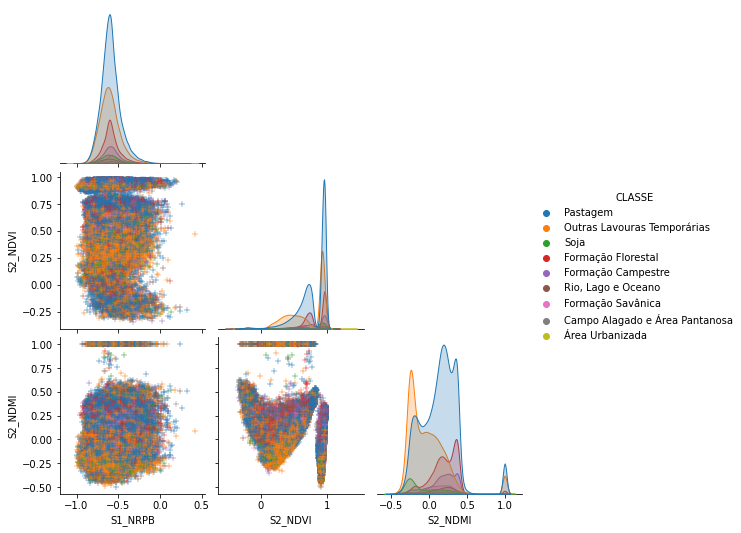

<Figure size 720x720 with 0 Axes>

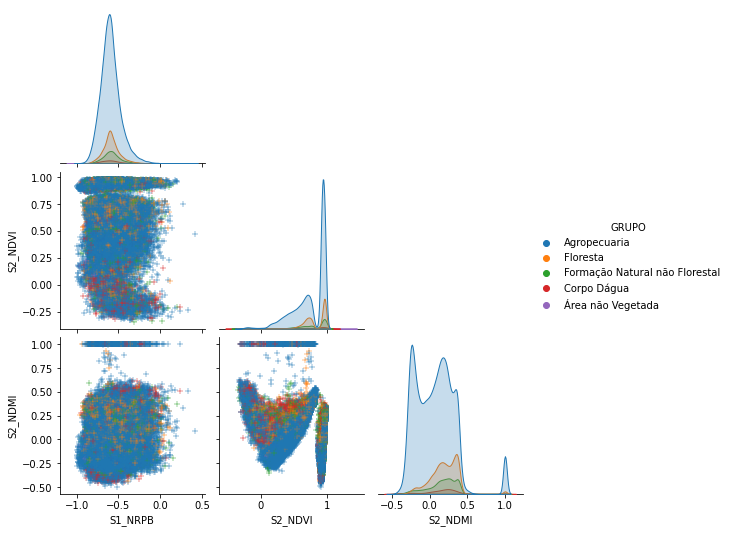

In [17]:
#Floresta
dataset.loc[dataset['DN'] == 3,  'CLASSE'] = 'Formação Florestal'
dataset.loc[dataset['DN'] == 4,  'CLASSE'] = 'Formação Savânica' 

dataset.loc[dataset['DN'] == 3,  'GRUPO'] = 'Floresta'
dataset.loc[dataset['DN'] == 4,  'GRUPO'] = 'Floresta'

#Formação Natural não Florestal
dataset.loc[dataset['DN'] == 11, 'CLASSE'] = 'Campo Alagado e Área Pantanosa'
dataset.loc[dataset['DN'] == 12, 'CLASSE'] = 'Formação Campestre'

dataset.loc[dataset['DN'] == 11, 'GRUPO'] = 'Formação Natural não Florestal'
dataset.loc[dataset['DN'] == 12, 'GRUPO'] = 'Formação Natural não Florestal'

#Agropecuaria
dataset.loc[dataset['DN'] == 15, 'CLASSE'] = 'Pastagem'
dataset.loc[dataset['DN'] == 39, 'CLASSE'] = 'Soja'
dataset.loc[dataset['DN'] == 41, 'CLASSE'] = 'Outras Lavouras Temporárias'

dataset.loc[dataset['DN'] == 15, 'GRUPO'] = 'Agropecuaria'
dataset.loc[dataset['DN'] == 39, 'GRUPO'] = 'Agropecuaria'
dataset.loc[dataset['DN'] == 41, 'GRUPO'] = 'Agropecuaria'

#Corpo D'água
dataset.loc[dataset['DN'] == 33, 'CLASSE'] = 'Rio, Lago e Oceano'

dataset.loc[dataset['DN'] == 33, 'GRUPO'] = 'Corpo Dágua'

#Área não Vegetada
dataset.loc[dataset['DN'] == 24, 'CLASSE'] = 'Área Urbanizada'

dataset.loc[dataset['DN'] == 24, 'GRUPO'] = 'Área não Vegetada'

plt.figure(figsize=(10,10))
sns.pairplot(dataset.sample(frac=1, random_state=1).reset_index(drop=True), 
             vars=['S1_NRPB',
                   'S2_NDVI',
                   'S2_NDMI'],
             hue='CLASSE', corner=True, dropna=True, markers='+', palette="tab10")
plt.show()

plt.figure(figsize=(10,10))
sns.pairplot(dataset.sample(frac=1, random_state=1).reset_index(drop=True), 
             vars=['S1_NRPB',
                   'S2_NDVI',
                   'S2_NDMI'],
             hue='GRUPO', corner=True, dropna=True, markers='+', palette="tab10")
plt.show()

## Verifica a correlação das bandas com os indices de vegetação e imprime os maiores que 50%

In [18]:
corr = dataset.corr()
corr = corr[(corr<=-0.5) | (corr>=0.5)]
plt.figure(figsize=(30,30))

corr = corr[['S1_NRPB','S1_NDVI','S2_NDVI','S2_NDMI']]

(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  # This is added back by InteractiveShellApp.init_path()


,S1_NRPB,S1_NDVI,S2_NDVI,S2_NDMI
fid,nan,nan,nan,nan
S2_NDMI,nan,nan,nan,1.00
S2_NDVI,nan,nan,1.00,nan
S1_NDVI,1.00,1.00,nan,nan
S1_NRPB,1.00,1.00,nan,nan
DN,nan,nan,nan,nan
S1_VHsum,nan,nan,nan,nan
S1_VHmean,nan,nan,nan,0.52
S1_VHmedian,nan,nan,nan,0.52
S1_VHstdev,nan,nan,nan,nan


<Figure size 2160x2160 with 0 Axes>

## Remove Outliers

In [19]:
dataset = dataset.loc[:]

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

lim_inf = dataset.quantile(0.015)
lim_sup = dataset.quantile(0.985)

for column in dataset:
  if ( column != 'fid' and column != 'DN' and column != 'Label' and column!='CLASSE' and column!="GRUPO"):
    dataset = dataset.loc[((dataset[column] >= lim_inf[column]) & (dataset[column] <= lim_sup[column])) |
                    ((dataset['DN']==4) | (dataset['DN']==11) | (dataset['DN']==24) | (dataset['DN']==33))]

# Remove as linhas com outliers
dataset = dataset.replace(np.inf, np.nan)
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True, drop=True)

Pastagem                          46693
Outras Lavouras Temporárias       26972
Formação Florestal                11565
Formação Campestre                 4955
Formação Savânica                  4034
Rio, Lago e Oceano                 3362
Soja                               2126
Campo Alagado e Área Pantanosa     1216
Área Urbanizada                      50
Name: CLASSE, dtype: int64


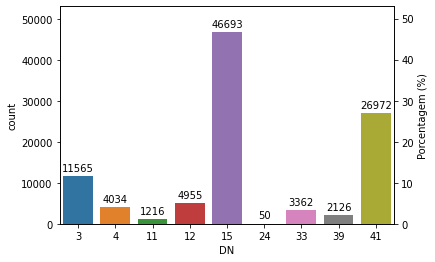

In [28]:
print(dataset.CLASSE.value_counts())
ax = sns.countplot(x='DN', data=dataset)
ax2 = ax.twinx()
ax2.set_ylim(0, 53500/np.sum(dataset.CLASSE.value_counts())*100)
ax2.set_ylabel('Porcentagem (%)')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+6000), ha='center', va='top', color='black', size=10)
ax.set_ylim(0, 53000)
plt.show()

# Tratamento dos dados

## Exclui colunas de acordo com a análise e discuções

In [ ]:
#### COLUNAS SEM CORRELAÇÂO com os INDICES DE VEGETACAO
colunas_para_remover = [
                        'S1_VHsum',                                   'S1_VHstdev',   'S1_VHmin',   'S1_VHmax',   'S1_VHvariance', 
                        'S1_VVsum',                                   'S1_VVstdev',   'S1_VVmin',   'S1_VVmax',   'S1_VVvariance', 
                        'S2_B1_sum',                                  'S2_B1_stdev',                              'S2_B1_variance',
                        'S2_B2_sum',                                                                             
                        'S2_B3_sum',                                                                             
                        'S2_B4_sum',                                                                             
                        'S2_B5_sum',                                  'S2_B5_stdev',                              'S2_B5_variance',
                        'S2_B6_sum',  'S2_B6_mean',  'S2_B6_median',  'S2_B6_stdev',  'S2_B6_min',  'S2_B6_max',  'S2_B6_variance',
                        'S2_B7_sum',  'S2_B7_mean',  'S2_B7_median',  'S2_B7_stdev',  'S2_B7_min',  'S2_B7_max',  'S2_B7_variance',
                        'S2_B8_sum',                                  'S2_B8_stdev',                'S2_B8_max',  'S2_B8_variance',
                        'S2_B8A_sum',                                 'S2_B8A_stdev', 'S2_B8A_min',               'S2_B8A_variance',
                        'S2_B9_sum',  'S2_B9_mean',  'S2_B9_median',  'S2_B9_stdev',  'S2_B9_min',  'S2_B9_max',  'S2_B9_variance',
                        'S2_B10_sum',                                 'S2_B10_stdev', 'S2_B10_min', 'S2_B10_max', 'S2_B10_variance',
                        'S2_B11_sum',                                 'S2_B11_stdev',                             'S2_B11_variance',
                        'S2_B12_sum',                                 'S2_B12_stdev',                             'S2_B12_variance']                        

#dataset.drop(columns=colunas_para_remover, axis=1, inplace=True)
dataset.drop(columns=colunas_para_remover, axis=1, inplace=True)
dataset.drop(columns=['CLASSE','GRUPO', 'fid'], axis=1, inplace=True)

## Imprime informações do dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100973 entries, 0 to 100972
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   S2_NDMI         100973 non-null  float64
 1   S2_NDVI         100973 non-null  float64
 2   S1_NDVI         100973 non-null  float64
 3   S1_NRPB         100973 non-null  float64
 4   DN              100973 non-null  int64  
 5   S1_VHmean       100973 non-null  float64
 6   S1_VHmedian     100973 non-null  float64
 7   S1_VVmean       100973 non-null  float64
 8   S1_VVmedian     100973 non-null  float64
 9   S2_B1_mean      100973 non-null  float64
 10  S2_B1_median    100973 non-null  float64
 11  S2_B1_min       100973 non-null  float64
 12  S2_B1_max       100973 non-null  float64
 13  S2_B2_mean      100973 non-null  float64
 14  S2_B2_median    100973 non-null  float64
 15  S2_B2_stdev     100973 non-null  float64
 16  S2_B2_min       100973 non-null  float64
 17  S2_B2_max 

## Atualiza a coluna de saída

In [ ]:
# Simplificar o problema inicial para testar as possibilidade
# Manter 5 saídas

def atualiza_saida(df):
  aux = df.loc[:]
  aux.loc[(aux['DN']==1) | (aux['DN']==3) | (aux['DN']==4) | (aux['DN']==5) | (aux['DN']==49), 'Label'] = int(0)
  #Floresta

  aux.loc[(aux['DN']==10) | (aux['DN']==11) | (aux['DN']==12) | (aux['DN']==32) | (aux['DN']==29) | 
            (aux['DN']==13), 'Label'] = int(1)
  #Formação natural não florestal

  aux.loc[(aux['DN']==14) | (aux['DN']==15) | (aux['DN']==18) | (aux['DN']==19) | (aux['DN']==39) |
            (aux['DN']==20) | (aux['DN']==40) | (aux['DN']==41) | (aux['DN']==36) | (aux['DN']==46) |
            (aux['DN']==47) | (aux['DN']==48) | (aux['DN']==9) | (aux['DN']==21), 'Label'] = int(2)
  #Agropecuária

  aux.loc[(aux['DN']==22) | (aux['DN']==23) | (aux['DN']==24) | (aux['DN']==30) | (aux['DN']==25), 'Label'] = int(3)
  #Área não vegetada

  aux.loc[(aux['DN']==26) | (aux['DN']==33) | (aux['DN']==21), 'Label'] = int(4)
  #Corpo d' água

  aux.drop(columns=['DN'], inplace = True)
  return aux

In [ ]:
dataset = atualiza_saida(dataset)

In [ ]:
def plot_saida(df):
  frequencia = df.groupby(by='Label').count().values[:,0]
  #print(aux)
  nomes = ['Floresta', 'Formação natural não florestal', 'Agropecuária', 'Área não Vegetada', "Corpo d' água"]
  #print(frequencia)

  fig, (ax1) = plt.subplots(1, 1, figsize=(7, 4))
  ax2 = ax1.twinx()

  x_coordinates = np.arange(len(nomes))
  ax1.bar(x_coordinates, frequencia, align='center', color='black')
  ax1.set_xlabel('Class')
  ax1.set_ylabel('Count')
  ax1.tick_params(axis='x', labelrotation=90)
  ax1.set_ylim(0, 85000)
  
  frequencia_porcentual = (np.array(frequencia)/np.sum(frequencia))*100

  ax2.bar(x_coordinates, frequencia_porcentual, align='center', color='black')
  ax2.set_xlabel('Class')
  ax2.set_ylabel('Percentage (%)')
  ax2.set_ylim(0, 85000/np.sum(frequencia)*100)
  

  for i in range(0, 5):
    #t = str(frequencia[i]).center(5) + '\n' + ('{:.1f}%'.format(frequencia_porcentual[i])).center(5)
    t = str(frequencia[i]).center(6)
    ax1.text(x=i-0.25 , y =frequencia[i]+1500 , s=f"{t}" , fontdict=dict(fontsize=12))

  ax1.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
  ax1.xaxis.set_major_formatter(plt.FixedFormatter(nomes))
  plt.show()
  #fig.savefig('new figure1.jpeg', format='jpeg', bbox_inches='tight', dpi=1000)

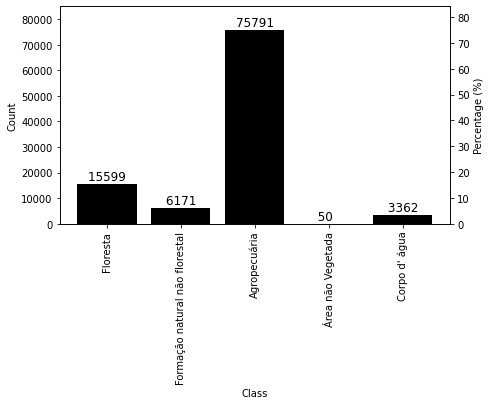

In [ ]:
plot_saida(dataset)

## Separa Entradas e saídas

In [ ]:
dataset_X = np.array(dataset.drop(columns=['Label']).values)
dataset_Y = np.array(dataset['Label'].values)
dataset_Y = keras.utils.to_categorical(dataset_Y, num_classes=5, dtype="int32")

## Undersampling

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset

from imblearn.under_sampling import EditedNearestNeighbours

undersample = EditedNearestNeighbours(n_neighbors=5)
X_add, Y_add = undersample.fit_resample(dataset_X, dataset_Y)

vet_index_to_add = []

## Seleciona os com agropecuária selecionados pelo algoritmo de undersampling
for i in range(0, X_add.shape[0]):
  item = Y_add[i,2]
  if item != 1:
    vet_index_to_add.append(i)

X_add = np.delete(X_add, vet_index_to_add, axis=0)
Y_add = np.delete(Y_add, vet_index_to_add, axis=0)

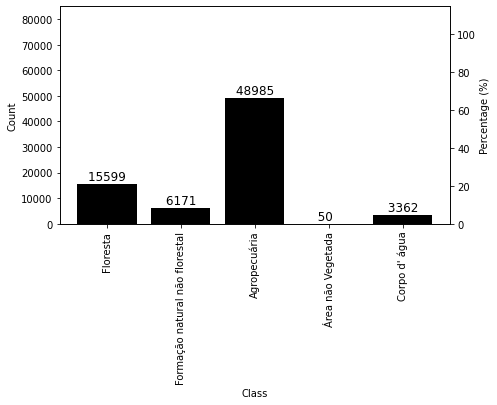

In [ ]:
vet_index_to_del = []

## Seleciona os itens com agropecuária do conjunto original para deletar e substituir pelos que foram escolhidos pelo undersampling
for i in range(0, dataset_X.shape[0]):
  item = dataset_Y[i,2]
  if item == 1:
    vet_index_to_del.append(i)

dataset_X = np.delete(dataset_X, vet_index_to_del, axis=0)
dataset_Y = np.delete(dataset_Y, vet_index_to_del, axis=0)

dataset_X = np.concatenate((dataset_X, X_add), axis=0)
dataset_Y = np.concatenate((dataset_Y, Y_add), axis=0)
y = pd.DataFrame({'Label':np.argmax(dataset_Y, axis=1), 'y':np.argmax(dataset_Y, axis=1)}, index=range(0, len(dataset_Y)))
plot_saida(y)